<a href="https://colab.research.google.com/github/nandinib1999/Weather-in-Szeged-2006-2016/blob/main/Weather_in_Szeged_2006_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/nandinib1999/Weather-in-Szeged-2006-2016

Cloning into 'Weather-in-Szeged-2006-2016'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [2]:
cd "/content/Weather-in-Szeged-2006-2016"

/content/Weather-in-Szeged-2006-2016


In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv("/content/Weather-in-Szeged-2006-2016/weatherHistory.csv")
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [120]:
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [122]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Loud Cover                96453 non-null  float64            
 10  Pressure (millibars)      96453 non-null  float64            
 11  Daily Summary  

In [123]:
df['Month'] = df['Formatted Date'].dt.month
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Month
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,3
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,3
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,4
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,4
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,9
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,9
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,9
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,9


In [124]:
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [125]:
df_na = df[df['Precip Type'].isna()]
df_na

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Month
52672,2012-04-11 14:00:00+00:00,Mostly Cloudy,NaN,19.016667,19.016667,0.26,14.8764,163.0,9.982,0.0,1002.40,Mostly cloudy until night.,4
52674,2012-04-11 16:00:00+00:00,Mostly Cloudy,NaN,17.850000,17.850000,0.28,13.7977,169.0,9.982,0.0,1001.79,Mostly cloudy until night.,4
52675,2012-04-11 17:00:00+00:00,Mostly Cloudy,NaN,16.322222,16.322222,0.32,10.8192,151.0,9.982,0.0,1001.60,Mostly cloudy until night.,4
52677,2012-04-11 19:00:00+00:00,Mostly Cloudy,NaN,12.566667,12.566667,0.43,9.0160,159.0,9.982,0.0,1001.92,Mostly cloudy until night.,4
52678,2012-04-11 20:00:00+00:00,Mostly Cloudy,NaN,12.927778,12.927778,0.47,17.6295,197.0,16.100,0.0,1002.20,Mostly cloudy until night.,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95584,2016-10-31 18:00:00+00:00,Mostly Cloudy,NaN,8.322222,7.044444,0.85,8.0339,290.0,0.000,0.0,1021.73,Mostly cloudy starting in the afternoon.,10
95585,2016-10-31 19:00:00+00:00,Mostly Cloudy,NaN,7.627778,6.183333,0.87,8.2271,293.0,0.000,0.0,1021.76,Mostly cloudy starting in the afternoon.,10
95586,2016-10-31 20:00:00+00:00,Mostly Cloudy,NaN,7.111111,5.511111,0.89,8.5008,297.0,0.000,0.0,1021.81,Mostly cloudy starting in the afternoon.,10
95587,2016-10-31 21:00:00+00:00,Partly Cloudy,NaN,6.672222,4.961111,0.90,8.6457,299.0,0.000,0.0,1021.83,Mostly cloudy starting in the afternoon.,10


In [126]:
df_na['Summary'].unique()

array(['Mostly Cloudy', 'Partly Cloudy', 'Overcast', 'Clear', 'Foggy'],
      dtype=object)

In [127]:
grouped_df = df.groupby(['Precip Type', 'Summary']).agg({'Formatted Date':'count'})
grouped_df

Formatted Date
Precip Type Summary                                            
rain        Breezy                                           42
            Breezy and Dry                                    1
            Breezy and Foggy                                  8
            Breezy and Mostly Cloudy                        490
            Breezy and Overcast                             472
            Breezy and Partly Cloudy                        379
            Clear                                          9371
            Dangerously Windy and Partly Cloudy               1
            Drizzle                                          39
            Dry                                              34
            Dry and Mostly Cloudy                            14
            Dry and Partly Cloudy                            86
            Foggy                                          4135
            Humid and Mostly Cloudy                          40
            Humid and Overcast                                7
            Humid and Partly Cloudy                          17
            Light Rain                                       63
            Mostly Cloudy                                 26028
            Overcast                                      13916
            Partly Cloudy                                 29915
            Rain                                             10
            Windy                                             8
            Windy and Dry                                     1
            Windy and Foggy                                   3
            Windy and Mostly Cloudy                          35
            Windy and Overcast                               42
            Windy and Partly Cloudy                          67
snow        Breezy                                           12
            Breezy and Foggy                                 27
            Breezy and Mostly Cloudy                         26
            Breezy and Overcast                              56
            Breezy and Partly Cloudy                          7
            Clear                                          1392
            Foggy                                          2982
            Mostly Cloudy                                  1886
            Overcast                                       2600
            Partly Cloudy                                  1720
            Windy and Foggy                                   1
            Windy and Overcast                                3

In [128]:
grouped_df_na = df_na.groupby(['Summary']).agg({'Formatted Date':'count'})
grouped_df_na

,Formatted Date
Summary,
Clear,127
Foggy,31
Mostly Cloudy,180
Overcast,81
Partly Cloudy,98


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


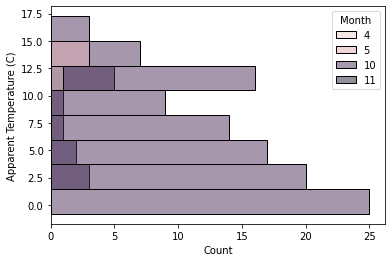

In [145]:
df_filter_clear = df[df['Summary'].isin(['Clear'])]
df_filter_clear['Missing'] = df_filter_clear['Precip Type'].isna()
df_filter_clear_missing = df_filter_clear[df_filter_clear['Missing'] == True]
sns.histplot(data=df_filter_clear_missing, y='Apparent Temperature (C)', hue="Month")

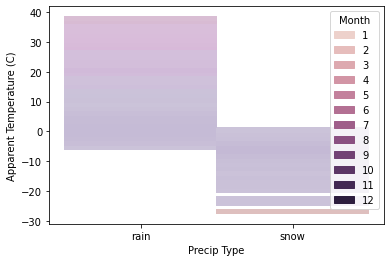

In [146]:
df_filter_not_missing = df_filter_clear[df_filter_clear['Missing'] == False]
sns.histplot(x='Precip Type', y='Apparent Temperature (C)', data=df_filter_not_missing, hue="Month")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


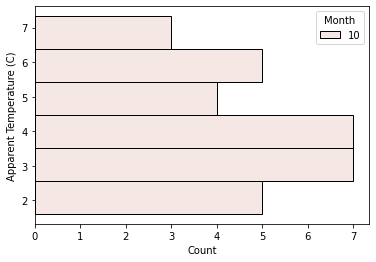

In [147]:
df_filter_foggy = df[df['Summary'].isin(['Foggy'])]
df_filter_foggy['Missing'] = df_filter_foggy['Precip Type'].isna()
df_filter_foggy_missing = df_filter_foggy[df_filter_foggy['Missing'] == True]
sns.histplot(data=df_filter_foggy_missing, y='Apparent Temperature (C)', hue="Month")

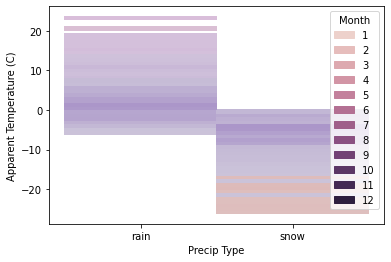

In [148]:
df_filter_not_missing = df_filter_foggy[df_filter_foggy['Missing'] == False]
sns.histplot(x='Precip Type', y='Apparent Temperature (C)', data=df_filter_not_missing, hue="Month")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


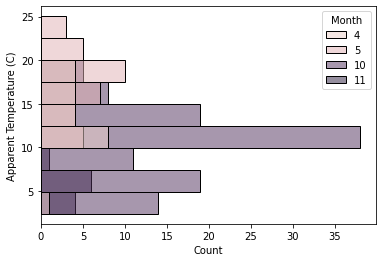

In [149]:
df_filter_mcloudy = df[df['Summary'].isin(['Mostly Cloudy'])]
df_filter_mcloudy['Missing'] = df_filter_mcloudy['Precip Type'].isna()
df_filter_mcloudy_missing = df_filter_mcloudy[df_filter_mcloudy['Missing'] == True]
sns.histplot(data=df_filter_mcloudy_missing, y='Apparent Temperature (C)', hue="Month")

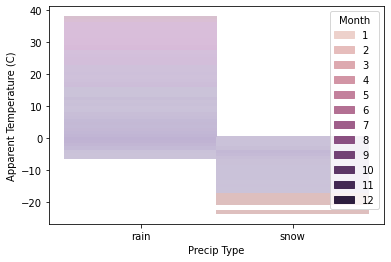

In [150]:
df_filter_not_missing = df_filter_mcloudy[df_filter_mcloudy['Missing'] == False]
sns.histplot(x='Precip Type', y='Apparent Temperature (C)', data=df_filter_not_missing, hue="Month")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


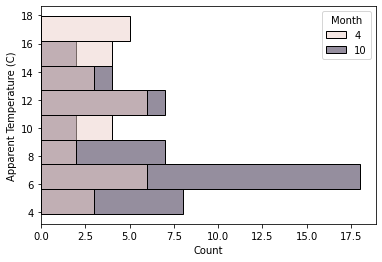

In [151]:
df_filter_overcast = df[df['Summary'].isin(['Overcast'])]
df_filter_overcast['Missing'] = df_filter_overcast['Precip Type'].isna()
df_filter_overcast_missing = df_filter_overcast[df_filter_overcast['Missing'] == True]
sns.histplot(data=df_filter_overcast_missing, y='Apparent Temperature (C)', hue="Month")

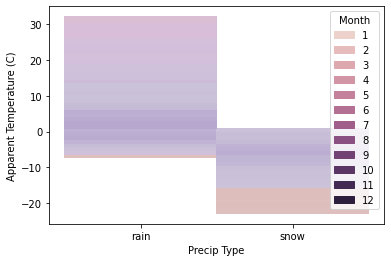

In [152]:
df_filter_not_missing = df_filter_overcast[df_filter_overcast['Missing'] == False]
sns.histplot(x='Precip Type', y='Apparent Temperature (C)', data=df_filter_not_missing, hue="Month")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


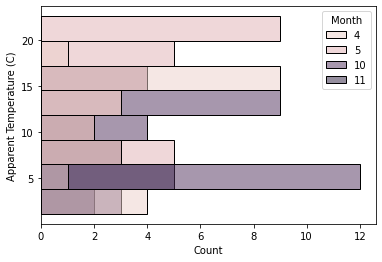

In [153]:
df_filter_pcloudy = df[df['Summary'].isin(['Partly Cloudy'])]
df_filter_pcloudy['Missing'] = df_filter_pcloudy['Precip Type'].isna()
df_filter_pcloudy_missing = df_filter_pcloudy[df_filter_pcloudy['Missing'] == True]
sns.histplot(data=df_filter_pcloudy_missing, y='Apparent Temperature (C)', hue="Month")

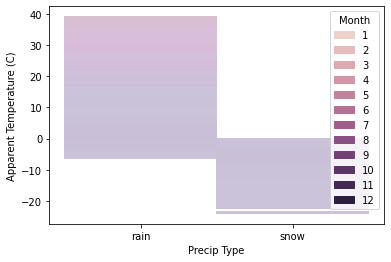

In [154]:
df_filter_not_missing = df_filter_pcloudy[df_filter_pcloudy['Missing'] == False]
sns.histplot(x='Precip Type', y='Apparent Temperature (C)', data=df_filter_not_missing, hue="Month")

In [141]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Month
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,6.523001
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,3.448501
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,4.000000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,7.000000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,10.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000,12.000000


In [142]:
df['Loud Cover'].value_counts()

0.0    96453
Name: Loud Cover, dtype: int64

In [143]:
df.drop(columns=['Loud Cover'], axis=1, inplace=True)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Month
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,3
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,3
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,4
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,4
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,4


In [144]:
df.drop(columns=['Daily Summary'], axis=1, inplace=True)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,3
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,3
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,4
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,4
